In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

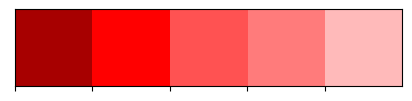

In [2]:
# задание палитры цветов
colors = ['#a70000', '#ff0000', '#ff5252', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

In [3]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [56]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.20, c('brown'), c('red'), 0.40, c('red'), \
                     c('brown'), 0.60, c('brown'), c('darkred'), 0.80, c('darkred')])

In [42]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('darkred'), 0.20, c('brown'), 0.40, c('red'), 0.60, c('indianred'), 0.80, c('lightcoral')])

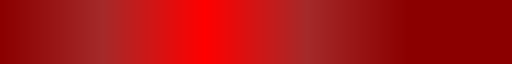

In [57]:
# вывод пользовательской палитры
rvb

In [6]:
# считывание данных с наименованиями административных районов г. Москва
adm = pd.read_csv('data_clean/adm.csv')

In [7]:
adm.head()

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,Серебряные пруды,Московская область,0.25,1


In [60]:
# преобразование наименований административных районов г. Москва в строку
text = ' '.join(list(adm['adm_name'].drop_duplicates().apply(lambda x: x.lower()).values))

In [61]:
type(text)

str

In [62]:
text

'серебряные пруды зарайск кашира серпухов луховицы коломна пущино ступино протвино чехов егорьевск шатура домодедово роговское наро-фоминск кленовское воскресенск вороновское раменское можайск подольск щаповское молодежный киевский краснопахорское новофедоровское михайлово-ярцевское руза бронницы орехово-зуево рязановское первомайское троицк десеновское одинцово воскресенское видное (ленинский) щербинка южное бутово сосенское жуковский филимонковское марушкинское северное бутово лыткарино чертаново южное люберцы бирюлево западное бирюлево восточное краснознаменск московский кокошкино внуково ясенево орехово-борисово южное дзержинский внуковское мосрентген чертаново центральное теплый стан орехово-борисово северное царицыно зябликово братеево павловский посад чертаново северное ново-переделкино коньково капотня солнцево москворечье-сабурово котельники тропарево-никулино обручевский зюзино нагорный печатники марьино нагатинский затон черемушки нагатино-садовники люблино очаково-матвеевск

In [63]:
# добавление заголовка в облако слов
text = text + ' '.join(['МОСКВЫ' for _ in range(875)])

In [39]:
# функция визуализации облака слов
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 8))
    plt.imshow(wordcloud) 
    plt.axis('off')

In [18]:
# импорт необходимых библиотек
from PIL import Image

In [19]:
# задание маски отображения облака слов
mask = np.array(Image.open('img/moscov.jpg'))

In [20]:
mask.shape

(200, 1050, 3)

In [21]:
#pip install wordcloud

In [22]:
#pip install stop-words

In [64]:
# формирование облака слов
from wordcloud import WordCloud
from stop_words import get_stop_words

STOPWORDS_RU = get_stop_words('russian')

wordcloud = WordCloud(width = 2000, 
                      height = 1000, 
                      random_state=42,
                      max_words = 250,
                      prefer_horizontal = 0.7,
                      contour_width = 1.5,
                      background_color='white', 
                      normalize_plurals = True,
                      colormap = rvb,
                      collocations=False, repeat = True, min_font_size = 10, 
                      stopwords = STOPWORDS_RU).generate(text)

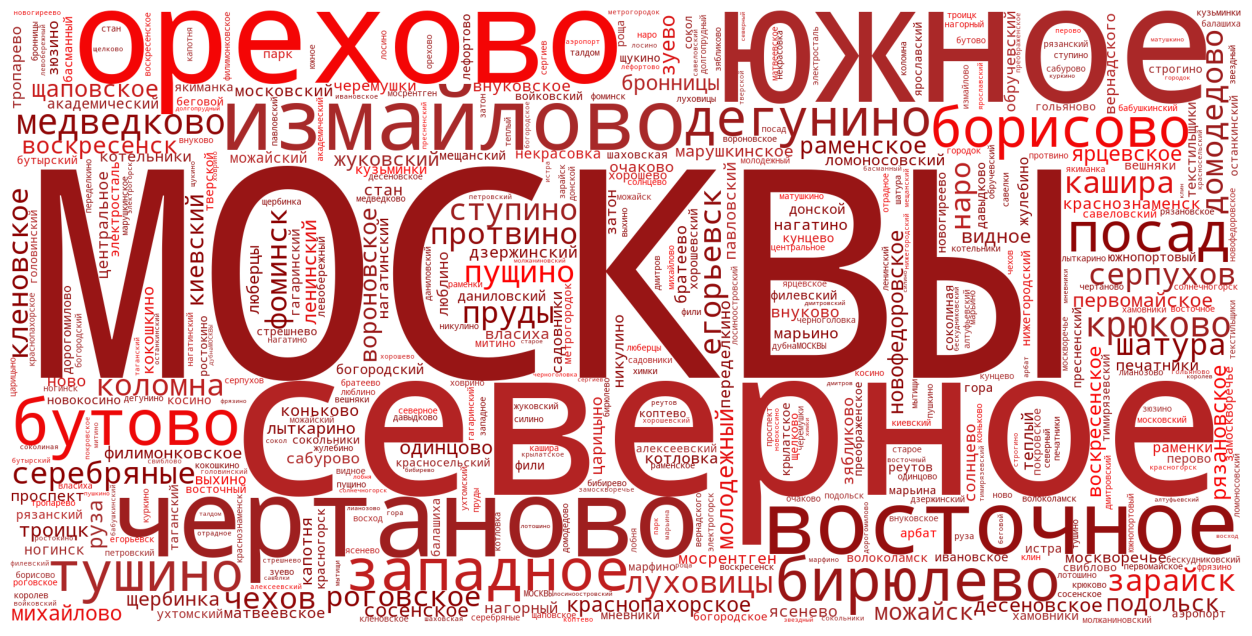

In [65]:
# визуализация сформированного облака слов
plot_cloud(wordcloud)